In [1]:
import numpy as np

import skimage
from skimage import data
from skimage import io
from skimage.measure import perimeter
from skimage.util import invert
from skimage import img_as_float
from skimage.morphology import reconstruction
from skimage import measure

from scipy.ndimage import gaussian_filter

import matplotlib.pyplot as plt

In [2]:
img = io.imread('images/wikiart/1936_1.jpg', as_gray=True)

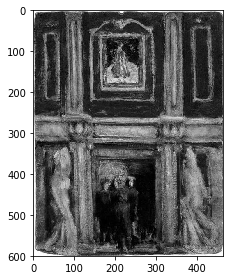

In [3]:
io.imshow(img)

In [4]:
img = invert(img)

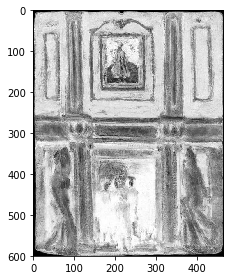

In [5]:
io.imshow(img)

In [6]:
type(img)

numpy.ndarray

In [7]:
img.shape

(600, 465)

In [8]:
perimeter(img, neighbourhood=8)

3.414213562373095

In [9]:
img

array([[0.00648118, 0.01209216, 0.02244314, ..., 0.01569412, 0.00841647,
        0.01122196],
       [0.03507098, 0.00563294, 0.00141373, ..., 0.00280549, 0.03473647,
        0.00561098],
       [0.00197922, 0.00197922, 0.00113098, ..., 0.00083333, 0.00447216,
        0.02101451],
       ...,
       [0.00448706, 0.00448706, 0.00224706, ..., 0.00814078, 0.00421922,
        0.00392157],
       [0.00448706, 0.00448706, 0.00448706, ..., 0.00141373, 0.00141373,
        0.00448706],
       [0.00448706, 0.00448706, 0.00448706, ..., 0.00478471, 0.00478471,
        0.00448706]])

In [10]:
# Filtering regional maxima
img = img_as_float(img)
img = gaussian_filter(img, 1)

In [11]:
seed = np.copy(img)
seed[1: -1, 1: -1] = img.min()
mask = img

In [12]:
dilated = reconstruction(seed, mask, method='dilation')

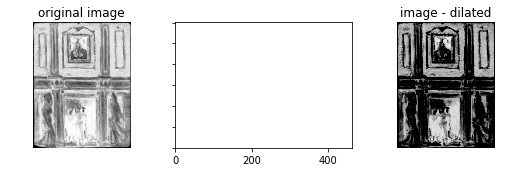

In [13]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(img, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax2.imshow(img - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

In [14]:
img = img - dilated

In [15]:
perimeter(dilated)

0.0

In [16]:
type(dilated)

numpy.ndarray

In [17]:
dilated.shape

(600, 465)

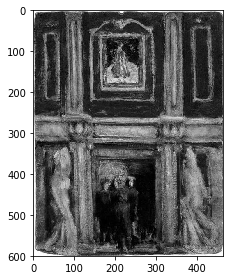

In [18]:
img = io.imread('images/wikiart/1936_1.jpg', as_gray=True)
io.imshow(img)

In [19]:
contours = measure.find_contours(img, 0.8)

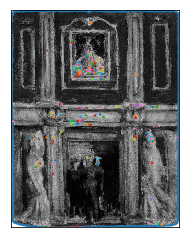

In [20]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

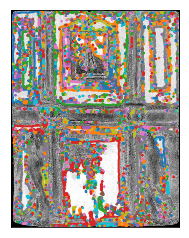

In [23]:
img = invert(img)
contours = measure.find_contours(img, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [24]:
type(contours)

list

In [25]:
len(contours)

2641

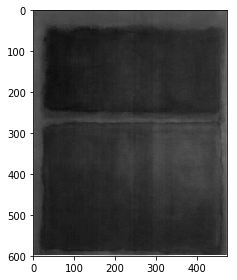

In [26]:
img = io.imread('images/wikiart/1955_1.jpg', as_gray=True)
io.imshow(img)

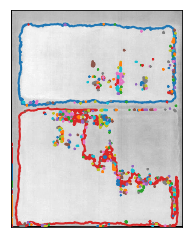

In [28]:
img = invert(img)
contours = measure.find_contours(img, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [32]:
contours = np.asarray(contours)

In [34]:
type(contours)

numpy.ndarray

In [35]:
perimeter(contours)

ValueError: setting an array element with a sequence.